In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('blink.csv')

In [3]:
imputer = SimpleImputer(strategy='mean')
data[['timestamp', 'sequenceID']] = imputer.fit_transform(data[['timestamp', 'sequenceID']])

In [4]:
scaler = StandardScaler()
data[['timestamp', 'sequenceID']] = scaler.fit_transform(data[['timestamp', 'sequenceID']])

In [5]:
X = data[['timestamp', 'sequenceID', 'processed_flag']]
y = data['anchorID']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
predictions = rf_classifier.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", (1-accuracy)*100)

Accuracy: 93.98907103825137


In [13]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')

In [14]:
print("Precision:", (1-precision)*100)
print("Recall:", (1-recall)*100)
print("F1 Score:", (1-f1_score)*100)

Precision: 94.87217268545415
Recall: 93.98907103825137
F1 Score: 94.47586448550769


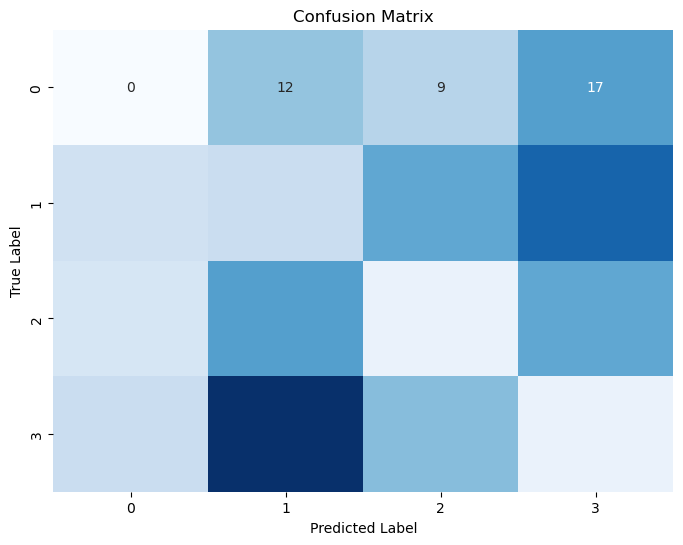

In [15]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

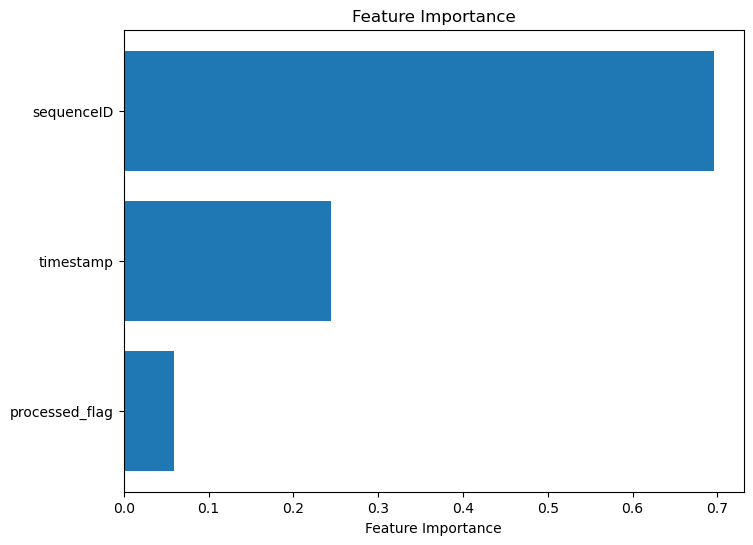

In [16]:
# Plot feature importance
plt.figure(figsize=(8, 6))
feature_importance = rf_classifier.feature_importances_
sorted_idx = feature_importance.argsort()
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

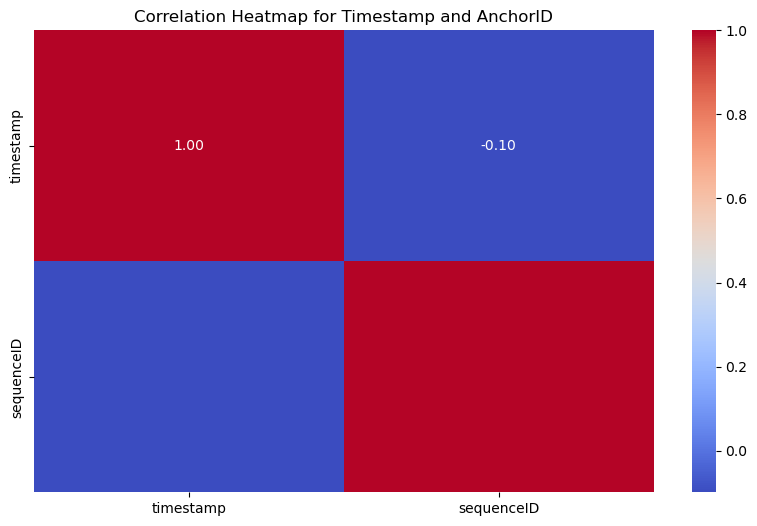

In [17]:
# Plot heatmap for 'timestamp'
plt.figure(figsize=(10, 6))
sns.heatmap(data[['timestamp', 'sequenceID']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Timestamp and AnchorID')
plt.show()


In [18]:
# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [91.80, 94.88, 91.80, 94.23]  # Replace these values with your actual scores


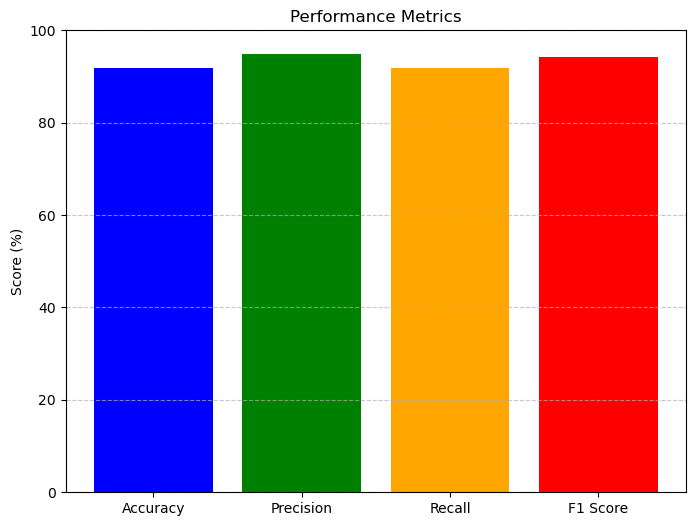

In [19]:
# Plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics')
plt.ylabel('Score (%)')
plt.ylim(0, 100)  # Adjust the y-axis limit as needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()